# Ek-1: Sayısal Filtreler

<a href="https://colab.research.google.com/drive/16DVrtpzTXVz78F10n0L6fIqaj2bG-Nbt?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sayısal Filtreler

Bu defterde aşağıdaki tür filtreler için bazı genel bilgiler ve uygulama örnekleri sunacağız. 

*   FIR filtreler
*   IIR filtreler

Diğer defterlerde de olduğu gibi hedefimiz filtre kuramını sunmaktan çok ihtiyacınız olduğunda geri dönüp hızlıca ana kavramları tekrar etmek için okuyabileceğiniz ve kod örneklerini alıp kendi probleminize uygun şekilde değiştirerek kullanabileceğiniz bir içerik sunmak. Sayısal filtre tasarımı konusunda çok sayıda iyi kaynak zaten erişime açık bir şekilde mevcut (örnekler: Julios O. Smith III, ["Introduction to Digital Filters"](https://ccrma.stanford.edu/~jos/filters/), J. Fessler ["Design of digital filters"](https://web.eecs.umich.edu/~fessler/course/451/l/pdf/c8.pdf), Brian McFee, ["Digital Signals Theory"](https://brianmcfee.net/dstbook-site/content/intro.html) ).  Sayısal filtreden kastımızın ne olduğunu; düşük geçiren filtre, yüksek geçiren filtre, bant geçiren filtre kategorilerini bildiğinizi ve bu kitaptaki ilk 3 defteri okuduğunuzu varsayarak ilerleyeceğiz. Genel kavramları özetledikten sonra Python ile filtre tasarımı ve kullanımına odaklanacağız.

**Filtre tasarımında hedef** belirli bir uygulamada ihtiyaç duyulan ve uygulamadaki koşullara göre frekans cevabı tanımlanmış bir sistemin dürtü cevabının veya sistemi tanımlayan katsayıların hesaplanmasıdır. 

Frekans cevabı tipik olarak; bastırılacak frekans bandında en az ne düzeyde bastırma gerektiği, geçirme bandında ne düzeyde varyasyona izin verileceği, filtrenin spektrumunda geçirme bandı ile bastırılma bandı arasında geçişin ne kadar keskin olacağı gibi kriterlerle belirlenir. Bu kriterlere uygun sistemin tasarlanması problemi birçok çalışmada ele alınmış ve artık standartlaşmış tasarım yöntemleri kullanılarak gerçekleştirilmektedir. Birçok sinyal işleme kütüphanesi ([Matlab Signal Processing Toolbox](https://www.mathworks.com/products/signal.html), [SciPy Signal Processing Module](https://docs.scipy.org/doc/scipy/reference/signal.html)) bu standartlaşmış tasarım adımlarını işleten hazır fonksiyonlar içermektedir. Bu defterde büyük oranda tasarım için scipy.signal modülü içerisindeki hazır fonksiyonları kullanıyor ve elde ettiğimiz sistemleri örnek sinyaller üzerinde uyguluyor olacağız. Ana kavramları kısaca özetleyerek başlayalım.

2 ve 3 no'lu defterimizde bir sayısal sistemin aşağıdaki ifade ile tanımlanabileceğini görmüştük:
$$
y[n] = \sum_{k = 0}^{N} b[k]x[n-k] - \sum_{k = 1}^{M} a[k]y[n-k]
$$

ve sistemin cevabını z-uzayında şu şekilde ifade etmiştik:

$$
H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{k = 0}^{N} b[k]z^{-k}}{(1+\sum_{k = 1}^{M} a[k]z^{-k})} = \dfrac {b_0 + b_1z^{-1} + b_2z^{-2} + \ldots + b_ Nz^{-N}}{a_0 + a_1z^{-1} + a_2z^{-2} + \ldots + a_ Mz^{-M}}
$$

$z = e^{j\omega}$ değişken dönüşümünü yaptığımızda sistemin frekans cevabını elde ederiz;

$$
H(e^{jw}) = \frac{Y(e^{jw})}{X(e^{jw})}=\frac{\sum_{k = 0}^{N} b[k]e^{-jkw}}{(1+\sum_{k = 1}^{M} a[k]e^{-jkw})} 
$$

Bu sistem aşağıdaki şekilde gecikme birimleri, çarpma ve toplama birimleri içeren bir yapı olarak temsil edilebilir ve gerçeklenebilir:

| <img src="https://www.researchgate.net/profile/Lucas-Cordeiro-3/publication/236688224/figure/fig1/AS:393161433206786@1470748398505/Direct-Form-I-structure-of-IIR-filter.png" width=400 height=300 /> |
| :-----------------------------------------------------------------------------------------------------------------------------------------------------------: |
|                                                   Şekil Ek1.1: _Direk form 1 ile sayısal sistem gerçekleme_                                                   |

Burada, sağdaki bloklar $y[n]$'nin $n$'deki değerine kendi geçmiş değerlerinin katkısını gösteren ***geri besleme*** kısmını içermekte. Solda ise sadece girdi sinyali olan $x[n]$'in geçmiş değerlerini katsayılarla çarpıp toplayan bölümü görüyoruz. 


Bu genel ifadenin özel hali olan bazı sistem kategorilerini ele almıştık. Bunların arasında geri besleme içermeyen MA (İng: Moving average) sistemler vardı:

$$
y[n] = \sum_{k = 0}^{N} b[k]x[n-k]
$$
Bu tür sistemlerde $y[n]$ , $x[n]$'in o anki ve geçmiş değerlerinden oluşturuluyor ve geri besleme yok. Bu çeşit sistemleri gerçeklemek için de şöyle bir yapı kullanabiliriz.

| <img src="https://miro.medium.com/max/1400/1*lHLODmQ38r8q1sLqqhPOUQ.png" width=300 height=120 /> |
| :-----------------------------------------------------------------------------------------------------------------------------------------------------------: |
|                                                   Şekil Ek1.2: _Direk form 1 ile MA sistem gerçekleme_                                                   |

(AR, MA, ARMA sistemler konusunda detaylı bilgi için [bakınız](http://kilyos.ee.bilkent.edu.tr/~kozat/papers/chapter2_v1.pdf))


Bir MA sistem ile AR veya ARMA sistem arasındaki en temel fark 
MA sistemde geri beslemenin (çıktının geçmiş değerlerinin yeni çıktı oluşumuna katkısı) olmamasıdır. Geri beslemenin olup olmaması sistemin dürtü cevabının sonlu uzunlukta veya sonsuz uzunlukta olmasını (ve birçok başka özelliği) etkileyen önemli bir farklılıktır. Filtreler söz konusu olduğunda ana kategorilerimizi bu fark belirleyecek; sistemin dürtü cevabının sonlu uzunlukta olduğu ve sonsuz uzunlukta olduğu sistemleri iki yarı kategori olarak ele alıp inceleyeceğiz:

*   Dürtü cevabı sonlu uzunlukta filtreler (İng: FIR: finite impulse response filters)
*   Dürtü cevabı sonsuz uzunlukta filtreler (İng: IIR: finite impulse response filters)

FIR filtreler'i geri besleme içermeyen filtreler, IIR filtreler'i de geri besleme içeren filtreler olarak düşünebiliriz. Bu, tasarımı ve uygulamayı da farklılaştıran önemli bir farktır.
*   FIR filtreleri tasarlarken sistemin dürtü cevabını, ideal filtre cevabından (bir kısmını keserek/pencereleyerek) elde edeceğiz. 
*   IIR filtreleri tasarlarken sistemin $b$ ve $a$ polinom katsayılarını özel yöntemlerle/tasarımlarla hesaplayacağız.  


Kullanacağımız modülleri yükleyelim. Ayrıca tasarladığımız filtrelerin spektrumlarını ve z-uzayında kutup ve sıfırlarını çizdiriyor olacağız. O fonksiyonları da diğer defterlerimizden kopyalayarak kullanalım. 

**Önemli bir detay:** Birçok filtre tasarım fonksiyonu kesim frekans parametresini normalize frekans değeri olarak alır. Bir örnekle açıklayalım: 10 kHz örnekleme frekansı olan bir sayısal sinyal düşünün. Bu sinyalde bulunabilecek en yüksek frekans bileşeni 5 kHz'tir ve spektrum bu sebeple 0-5kHz aralığındadır. Kesim frekansı 1 kHz olan bir düşük geçiren filtre tasarlamak istediğimizi düşünelim. Bu kesim frekansı tüm spektrum 0-1 aralığında düşünüldüğünde 0.2 normalize frekans değerine ($f_c/f_{max} = 1 kHz/ 5 kHz= 0.2$) karşılık gelir. Filtrelerimizi tasarlarken kesim frekansları için bu şekilde normalize frekans değerleri kullanarak tasarlayacağız. Bu şu anlamı da taşımaktadır: 0.2 normalize kesim frekansına sahip olacak şekilde tasarlanan bir düşük geçiren filtre için; filtreyi uyguladığımız sayısal sinyalin örnekleme frekansı 10 kHz ise filtre 0-1 kHz bandını geçirecek, sinyalin örnekleme frekansı 20 kHz ise filtre 0-2 kHz bandını geçirecektir. Karşılaştırmaları kolaylaştırmak için spektrum çizimlerimizde frekans eksenini normalize frekans cinsinden temsil etmeyi tercih edeceğiz. 

In [ ]:
import os
import numpy as np
import random
import zipfile
from scipy import signal, io
import matplotlib.pyplot as plt
import urllib.request
import soundfile as sf # Ses dosyalarını okumak için kullanacağımız kütüphane 
from IPython.display import Audio
# Çizimler oluşturulurken listelenen uyarıları kapatalım
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [ ]:
# Defter 3'ten kopyalandı
# Kutuplar ve sıfırları z-uzayında görselleştirme fonksiyonu
def z_uzayi_cizdir(kutuplar, sifirlar):
  plt.figure(figsize=(4, 4))
  # Birim çember çizimi
  t = np.linspace(0,2*np.pi, 100)
  plt.plot(np.cos(t), np.sin(t), 'k')

  # Eksen doğrularının çizimi
  plt.plot([0,0], [-1,1], 'k', linewidth=0.5)
  plt.plot([-1,1], [0,0], 'k', linewidth=0.5)

  # Sıfır ve kutupların çizimi
  for kutup in kutuplar:
    plt.plot(kutup.real, kutup.imag, 'x', markersize=10, color='red')
  for sifir in sifirlar:
    plt.plot(sifir.real, sifir.imag, 'o', markersize=10, color='red')

  plt.text(-0.95, 0.95, 'z uzayı', fontsize=14)
  plt.text(-0.8, -0.07, 'gerçek', fontsize=13)
  plt.text(-0.15, 1.03, 'sanal', fontsize=13)
  plt.grid();

In [ ]:
# Defter 3'ten kopyalandı
# scipy.signal.freqz kullanarak frekans cevabı çizdirme fonksiyonu
def frekans_cevabi_cizdir(b, a):
  # a ve b polinomları verilen bir sistemin frekans cevabının hesaplanması
  w, h = signal.freqz(b, a) # w frekans değerlerini, h ise H(e^jw) degerlerini içeriyor
  # frekans eksenini normalize edelim, bu karşılaştırmalarımızı kolaylaştıracak
  w /= np.pi 

  fig, ax1 = plt.subplots();
  ax1.set_title('Filtre frekans cevabı');
  ax1.plot(w, 20*np.log10(abs(h)), 'b');
  ax1.set_ylabel('Genlik [dB]', color='b');
  ax1.set_xlabel('Normalize frekans [$\pi$ radyan/örnek]');
  ax2 = ax1.twinx();
  angles = np.unwrap(np.angle(h));
  ax2.plot(w, angles, 'g');
  ax2.set_ylabel('Açı (radyan)', color='g');
  ax2.grid();
  ax2.axis('tight');
  plt.show();

Spektrum ve dalga formu çizim fonksiyonlarını karşılaştırmalı çizim opsiyonu sunmak için tek veya iki sinyali liste içerisinde alacak şekilde yazalım.

In [ ]:
# Defter 2'den kopyalandı, ilk parametre değiştirildi
# Numpy.fft.fft fonksiyonu kullanarak frekans cevabı çizdiren fonksiyon (faz spektrumunu numpy.unwrap ile açar)
def spektrum_cizdir(sinyaller_listesi, frekans_nokta_sayisi=512, sadece_genlik_cizdir=False):
  '''Karşılaştırmalı çizimleri kolaylaştırmak için sinyal(ler) liste olarak alınıyor.
  Listede tek öğe bulunduğu durumda içeriği: [x[n]], ikinci öğe bulunduğu durumda içeriği: [x[n],y[n]] olduğu varsayılıyor 
  '''
  x_n = sinyaller_listesi[0]
  if len(sinyaller_listesi) > 1:
    y_n = sinyaller_listesi[1]
  else:
    y_n = np.array([])
  
  # Fourier dönüşümü bize simetrik bir sonuç vereceği için bütününü oluşturduktan sonra ilk kısmını alalım
  # bu amaçla iki kat boyut kullanıp ortadan böleceğiz
  X_f = np.fft.fft(x_n, frekans_nokta_sayisi * 2)
  X_f = X_f[:frekans_nokta_sayisi]

  # Genlik ve faz bileşenlerinin hesaplanması
  X_abs = np.abs(X_f)
  X_abs[X_abs < np.finfo(float).eps] = np.finfo(float).eps # log operasyonundan önce önlem
  genlik_w_x = 20 * np.log10(X_abs)
  faz_w_x = np.unwrap(np.angle(X_f)) # "unwrap"(katlamayı açma) işlemi eklendi

  if y_n.size > 0:
    Y_f = np.fft.fft(y_n, frekans_nokta_sayisi * 2)
    Y_f = Y_f[:frekans_nokta_sayisi]
    Y_abs = np.abs(Y_f)
    Y_abs[Y_abs < np.finfo(float).eps] = np.finfo(float).eps # log operasyonundan önce önlem
    genlik_w_y = 20 * np.log10(Y_abs);faz_w_y = np.unwrap(np.angle(Y_f))

  # Frekans ekseninde normalize frekans değerleri serisi
  f_normalize = np.arange(0, frekans_nokta_sayisi) / frekans_nokta_sayisi
  
  # Spektrum çizdirme adımları
  plt.figure(figsize=(12,3))
  if sadece_genlik_cizdir:
    plt.title('Genlik spektrumu')
    plt.plot(f_normalize, genlik_w_x, 'b', label='|X($\omega$)|(dB)')
    plt.ylabel('|X($\omega$)|(dB)', color='b')
    plt.xlabel('Normalize frekans [$\pi$ radyan/örnek]')
    plt.grid()
    if y_n.size > 0:
      plt.plot(f_normalize, genlik_w_y, 'r', label='|Y($\omega$)|(dB)')
      plt.legend()
      # görselleri iyileştirmek için eksen sınırlarının kontrolü
      plt.ylim(max(-60, min(np.min(genlik_w_x), np.min(genlik_w_y))), max(np.max(genlik_w_x), np.max(genlik_w_y)))
    else:
      # görselleri iyileştirmek için eksen sınırlarının kontrolü
      plt.ylim(max(-60, np.min(genlik_w_x)), np.max(genlik_w_x))
  else:
    plt.subplot(1,2,1)
    plt.title('Genlik spektrumu')
    plt.plot(f_normalize, genlik_w_x, 'b')
    plt.ylabel('|X($\omega$)|(dB)', color='b')
    plt.xlabel('Normalize frekans [$\pi$ radyan/örnek]')
    plt.grid()
    if y_n.size > 0:
      plt.plot(f_normalize, genlik_w_y, 'r', label='|Y($\omega$)|(dB)')
      plt.legend()
    
    plt.subplot(1,2,2)
    plt.title('Faz spektrumu')
    plt.plot(f_normalize, faz_w_x, 'b', label='faz(X($\omega$))')
    plt.ylabel('faz(X($\omega$)) (radyan)', color='b')
    plt.xlabel('Normalize frekans [$\pi$ radyan/örnek]')
    plt.grid()
    if y_n.size > 0:
      plt.plot(f_normalize, faz_w_y, 'r', label='faz(Y($\omega$))')
      plt.legend()
  plt.show()

In [ ]:
def dalga_formu_cizdir(sinyaller_listesi, ornekleme_fr):
  '''Karşılaştırmalı çizimleri kolaylaştırmak için sinyal(ler) liste olarak alınıyor.
  Listede tek öğe bulunduğu durumda içeriği: [x[n]], ikinci öğe bulunduğu durumda içeriği: [x[n],y[n]] olduğu varsayılıyor 
  '''
  x_n = sinyaller_listesi[0]
  if len(sinyaller_listesi) > 1:
    y_n = sinyaller_listesi[1]
  else:
    y_n = np.array([])

  zaman_serisi = np.arange(0, x_n.shape[0]/ornekleme_fr, 1/ ornekleme_fr)
  if zaman_serisi.shape[0] > x_n.shape[0]:
    zaman_serisi = zaman_serisi[:x_n.shape[0]]
  plt.figure(figsize=(12, 4))
  plt.plot(zaman_serisi, x_n, 'b', label='x[n]');
  if y_n.size > 0:
    plt.plot(zaman_serisi, y_n, 'r', label='y[n]');
    plt.legend()
  plt.xlabel('Zaman (saniye)'); plt.ylabel('sinyal genliği');

### Filtre uygulamalarından kullanılacak test sinyallerinin yüklenmesi

Şimdi deneylerde kullanmak üzere bir dizi test sinyali yükleyelim.  

**Test sinyali 1 : Sentetik harmonik sinyal**

İlk test sinyalimiz bu defterin en sonunda sunulan kodla oluşturulmuş temel titreşim frekansının tam sayılı katlarında harmonikler içeren bir sentetik sinyal. Genlik spektrumunu(Şekil Ek1.4) incelediğinizde harmonikleri gözleyebilirsiniz.

In [ ]:
# Test sinyali 1: Sentetik harmonik sinyal (sinyali oluşturan kod için defterin sonuna bakınız)
url = 'https://raw.githubusercontent.com/barisbozkurt/dataDumpForCourses/master/harmonic_signal.txt'
urllib.request.urlretrieve(url,'harmonic_signal.txt')
test_sinyali_1 = np.loadtxt('harmonic_signal.txt')
test_sinyali_1_ornekleme_fr = 10000 # Örnekleme frekansı Hz

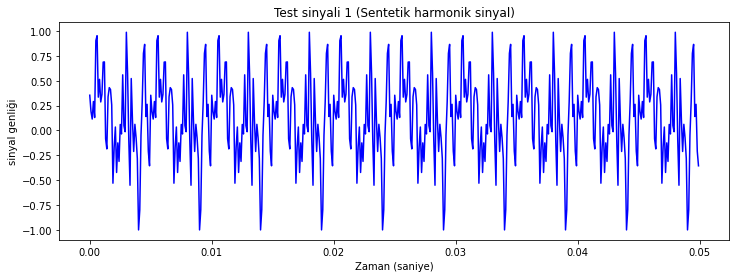

In [ ]:
dalga_formu_cizdir([test_sinyali_1], test_sinyali_1_ornekleme_fr)
plt.title('Test sinyali 1 (Sentetik harmonik sinyal)');

Şekil Ek1.3: Test sinyali 1 dalga formu

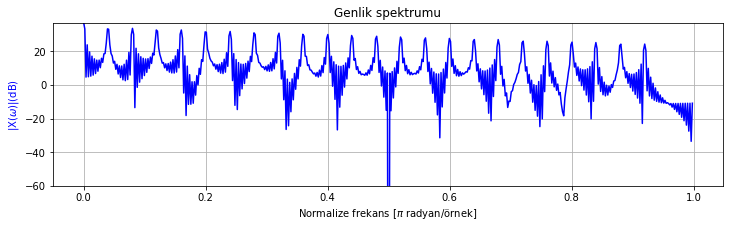

In [ ]:
spektrum_cizdir([test_sinyali_1], sadece_genlik_cizdir=True)

Şekil Ek1.4: Test sinyali 1 genlik spektrumu

**Test sinyali 2: EKG sinyali**

[MIT-Biomedical Signal and Image Processing Labs](https://ocw.mit.edu/courses/hst-582j-biomedical-signal-and-image-processing-spring-2007/pages/labs/) , [Lab-1 ECG sinyal işleme](https://ocw.mit.edu/courses/hst-582j-biomedical-signal-and-image-processing-spring-2007/d488a43192bf9e1059c89bc756e7c16a_lab1_ecg.pdf), "3.2 Week 1: Signal Conditioning/Noise Reduction" başlıklı lab dökümanında paylaşılan EKG sinyali.


In [ ]:
url = 'https://ocw.mit.edu/courses/hst-582j-biomedical-signal-and-image-processing-spring-2007/8900fe7d215ec3068342f2b91ecbe501_lab1files.zip'
dosya_ismi = 'lab1files.zip'
urllib.request.urlretrieve(url,dosya_ismi)
# zip pakedinin açılması
zip_ref = zipfile.ZipFile(dosya_ismi, 'r')
zip_ref.extractall()
zip_ref.close()
mat = io.loadmat('lab1files/week1/normal.mat')
zaman_serisi = mat['normal'][:,0]
ekg_sinyal = mat['normal'][:,1]
# Soru tanımında 5-10 saniye uzunluğunda sinyal alınması önerilmiş
# Baştan 8 saniyelik kısmı alalım
sure = 8
test_sinyali_2 = ekg_sinyal[zaman_serisi < sure]
zaman_serisi_2 = zaman_serisi[zaman_serisi < sure]
# Örnekleme periyodunu ardışık iki örnek arasındaki zaman farkı olarak bulabiliriz 
#  float kullanıldığı için tek bir fark değeri kullanmak yerine farkların ortalamasını kullanmak daha güvenli olabilir
test_sinyali_2_ornekleme_periodu = np.mean(np.diff(zaman_serisi)); 
test_sinyali_2_ornekleme_fr = int(1 / test_sinyali_2_ornekleme_periodu)
print('Örnekleme frekansı: ', test_sinyali_2_ornekleme_fr, 'Hz')

Örnekleme frekansı:  249 Hz


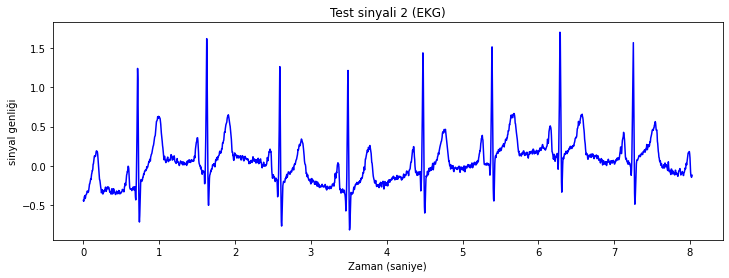

In [ ]:
dalga_formu_cizdir([test_sinyali_2], test_sinyali_2_ornekleme_fr)
plt.title('Test sinyali 2 (EKG)');

Şekil Ek1.5: Test sinyali 2 dalga formu

Sinyalin dalga formunu incelediğimizde [EKG](https://en.wikipedia.org/wiki/Electrocardiography) için beklenilen dalga formu bileşenlerini görmekle beraber yaklaşık 4 saniye periyodlu bir düşük frekans bileşeni gözlüyoruz. Bu bileşeni bir çeşit gürültü olarak düşünebiliriz. 

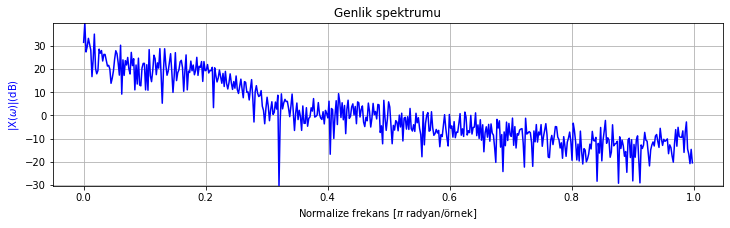

In [ ]:
spektrum_cizdir([test_sinyali_2], sadece_genlik_cizdir=True)

Şekil Ek1.6: Test sinyali 2 genlik spektrumu

**Test sinyali 3: Müzik sinyali**

https://archive.org/details/cd_uberjam_john-scofield-band/disc1/03.+John+Scofield+Band+-+Jungle+Fiction.flac 

Test sinyali 3 çok enstrümanlı bir kayıt. Yapacağımız filtre uygulamalarında sonucu dinleyerek karşılaştırma imkanı tanıyacağı için bu sinyali tercih ettik. 

In [ ]:
# John Scofield Band, Überjam albümünde bir kesit
url = 'https://archive.org/download/cd_uberjam_john-scofield-band/disc1/02.%20John%20Scofield%20Band%20-%20Ideofunk_sample.mp3'
urllib.request.urlretrieve(url,'funk_sample.mp3');
# mp3 -> wav dönüşüm işlemi
os.system('ffmpeg -i funk_sample.mp3 -vn -acodec pcm_s16le -ac 1 -ar 44100 -f wav funk_sample.wav');
test_sinyali_3, test_sinyali_3_ornekleme_fr = sf.read('funk_sample.wav')
test_sinyali_3 = test_sinyali_3 / np.max(np.abs(test_sinyali_3)) # genlik normalizasyonu
Audio(test_sinyali_3, rate=test_sinyali_3_ornekleme_fr)

Output hidden; open in https://colab.research.google.com to view.

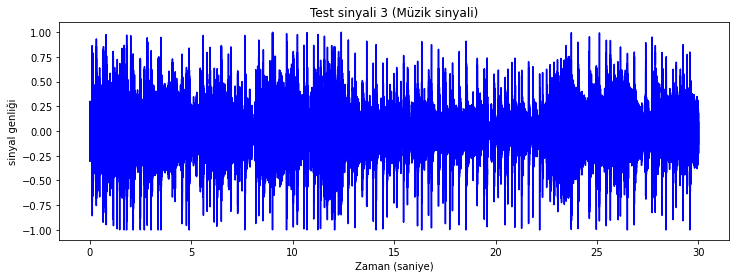

In [ ]:
dalga_formu_cizdir([test_sinyali_3], test_sinyali_3_ornekleme_fr)
plt.title('Test sinyali 3 (Müzik sinyali)');

Şekil Ek1.7: Test sinyali 3 dalga formu

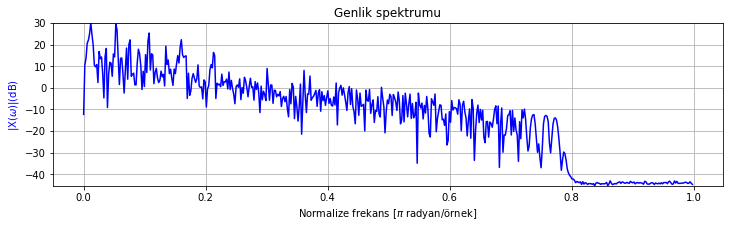

In [ ]:
spektrum_cizdir([test_sinyali_3], sadece_genlik_cizdir=True)

Şekil Ek1.8: Test sinyali 3 genlik spektrumu

Sinyalin spektrumu 0.8 üzeride boş. Büyük ihtimalle bu sinyal önce örnekleme frekansı 32 kHz'de seçilerek kaydedilmiş (bu durumda en yüksek frekans olarak 16kHz'e kadar bileşen içerebilir) ve daha sonra örnekleme 44 kHz'e yükseltilmiş. Yükseltme işlemi yeni bileşen eklemeden spektrum bandını 0-22 kHz bandına genişlettiği için genişleme bölgesinde (16 kHz-22 kHz) bileşen görmüyoruz. Bu tek ihtimal değil, bir sebeple (örneğin yüksek frekans gürültüsü varlığı) orijinal örnekleme frekansı 44 kHz olan sinyalin düşük geçiren filtreden geçirilmiş olması da mümkün. 

**Test sinyali 4: Gürültülü konuşma sinyali**

Bu test sinyal örneğini temiz bir konuşma sinyaline bant sınırlı bir gürültü ekleyerek oluşturacağız.

In [ ]:
url = 'https://github.com/barisbozkurt/dataDumpForCourses/raw/master/exampleSpeech.wav'
urllib.request.urlretrieve(url,'exampleSpeech.wav')
konusma_sinyali, test_sinyali_4_ornekleme_fr = sf.read('exampleSpeech.wav')

konusma_sinyali /= np.max(np.abs(konusma_sinyali)) # genlik normalizasyonu

# Bant-sınırlı gürültü sinyalinin oluşturulması
b, a = signal.butter(15, [0.5, 0.7], 'bandpass')
gurultu = signal.lfilter(b,a, np.random.rand(konusma_sinyali.shape[0],)-0.5)

test_sinyali_4 = konusma_sinyali + 0.1 * gurultu
Audio(test_sinyali_4, rate=test_sinyali_4_ornekleme_fr)

Sinyali dinleyiniz; sinyalde belirli bir miktar gürültü olduğunu duyacaksınız. Bu gürültüden kurtulmak için filtre tasarlayıp kullanacağız.

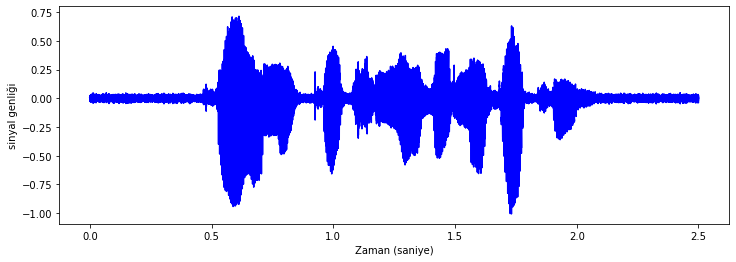

In [ ]:
dalga_formu_cizdir([test_sinyali_4], test_sinyali_4_ornekleme_fr)

Şekil Ek1.9: Test sinyali 4 dalga formu

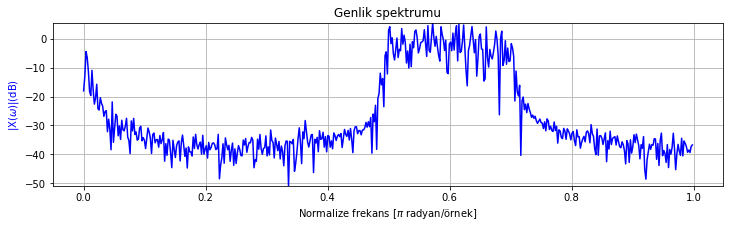

In [ ]:
spektrum_cizdir([test_sinyali_4], sadece_genlik_cizdir=True)

Şekil Ek1.9: Test sinyali 4 genlik spektrumu

Genlik spektrumunda eklediğimiz gürültü bileşenlerini görebilirsiniz.

### Filtre uygulama problemleri tanımları

Burada yüklediğimiz test sinyalleri üzerinde bazı problemler sunuyoruz. Problem tanımlarını inceleyiniz, daha sonra defteri okumayı tamamladığınızda bu problemleri çözen kodlar yazmaya çalışınız. Problemlerin bazılarına örnek çözümleri defterimizin en altında sunuyoruz.

**1)** Test sinyali 1'in ilk harmoniğinin frekansının 150-250 Hz bandında olduğu bilinmektedir. Bu harmoniği izole etmek (diğer bileşenleri bastırıp sadece o bileşenin kalmasını sağlamak) için bir filtre tasarlayınız ve sinyale uygulayınız. 

**2)** Test sinyali 2 bir EKG sinyalidir ve sinyalin dalga formunda yaklaşık 4 saniye periyodlu bir düşük frekanslı gürültü ve bir miktar da yüksek frekans gürültüsü gözlüyoruz (Şekil Ek1.5'i inceleyiniz). Sinyali bu gürültülerden temizlemek için filtre tasarlayınız ve sinyale uygulayınız. 

**3)** Test sinyali 3 bir müzik sinyalidir. Bu sinyale 3 yollu "equalizer" uygulanarak bas-mid-tiz dengelerinde değişiklikler yapılmak istenmektedir. 
<img src="https://electro-dan.co.uk/electronics/subwoofer/p09_fig2.gif" width=350/>

Şekil Ek1.10: 3 yollu "equalizer" filtre frekans cevapları


Bu filtreleri tasarlayınız ve filtreleri uygulayarak şu sinyalleri oluşturunuz:
*a)* Basları 10 dB açılmış sinyal, 
*b)* Mid'leri 10 dB azaltılmış sinyal, 
*c)* Tizleri 6 dB açılmış sinyal

**4)** Test sinyali 4, bant sınırlı gürültü içeren bir konuşma sinyalidir. Sinyalin spektrumunu inceleyip gürültünün bulunduğu bant aralığını yaklaşık olarak tespit ediniz. Gürültüyü kısan bir filtre tasarlayıp uygulayınız. 

Yukarıdaki tüm egzersizlerde filtreleme sonrası elde edilen sinyalin dalga formunu ve spektrumunu orijinal sinyalinkilerle beraber çizdiriniz. Her bir filtreleme işlemini hem FIR ve hem IIR filtrelerle gerçekleştirmeye çalışınız. Dalga formunun önemli olduğu ve bozulduğu durumlarda gerekli önlemleri alınız. 


## FIR filtre tasarımı

**İdeal filtre dürtü cevabından yola çıkarak filtre tasarımı:** 

2 no'lu defterimizde [ideal filtre cevabı](https://ccrma.stanford.edu/~jos/sasp/Ideal_Lowpass_Filter.html)ndan yola çıkarak düşük geçiren filtre dürtü cevabı elde edebileceğimizi görmüştük. (Sinc fonksiyonundan yola çıkarak filtre tasarımı için başka bir örnek için [bakınız](https://tomroelandts.com/articles/how-to-create-a-simple-low-pass-filter))

$$
h[n] = \frac{sin(nw_c)}{n\pi} 
$$

$w_c = 0.25\pi$ *radyan/örnek* için 31 noktadan oluşan bir dürtü cevabı oluşturup frekans cevabını inceleyelim:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


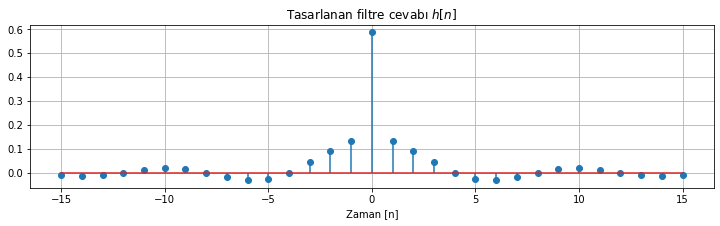

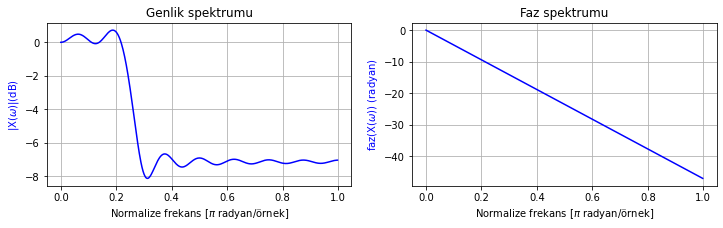

In [ ]:
N = 31
w_c = 0.25 * np.pi
n = np.arange(-N//2 + 1, N//2 + 1)
h_n = np.sin(w_c * n) / (np.pi * n)
h_n[n==0] = 1 # n= 0'da nan olarak hesaplanır, 1 olmalı
# Filtrenin uygulanacağı sinyalin genliğini büyütmemesi için dürtü cevabını normalize edelim
h_n /= np.sum(h_n)
fig = plt.figure(figsize=(12.25,3))
plt.stem(n, h_n, use_line_collection=True);plt.grid();plt.title('Tasarlanan filtre cevabı $h[n]$')
plt.xlabel('Zaman [n]')
spektrum_cizdir([h_n])

Şekil Ek1.11: Filtre dürtü cevabı olarak oluşturulan zamanda sınırlı uzunlukta sinc fonksiyonu ve spektrumu

Bir düşük geçiren sistem dürtü cevabı elde etmiş olduk. Faz cevabı doğrusal. Bir sinyale uygulamak istediğimizde sinyali bu dürtü cevabı ile konvolüsyona tabi tutmamız yeterli olacaktır. İlk test sinyaline uygulayalım:

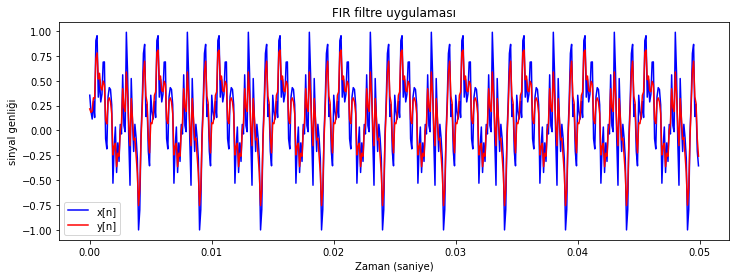

In [ ]:
test_sinyali_1_filtrelenmis = np.convolve(test_sinyali_1, h_n)

# Konvolüsyon işlemi ile elde edilen sinyale baş ve son kısmında N/2 örnek eklendiği için çıkartıp çizdirelim
test_sinyali_1_filtrelenmis = test_sinyali_1_filtrelenmis[N//2:N//2+test_sinyali_1.size]
dalga_formu_cizdir([test_sinyali_1, test_sinyali_1_filtrelenmis], test_sinyali_1_ornekleme_fr) 
plt.title('FIR filtre uygulaması');

Şekil Ek1.12: Test sinyali 1 ve FIR filtre ile ve filtrelenmiş sürümünün dalga formu  

Orijinal ve filtrelenmiş sinyallerimizin genlik spektrumlarını da karşılaştıralım:

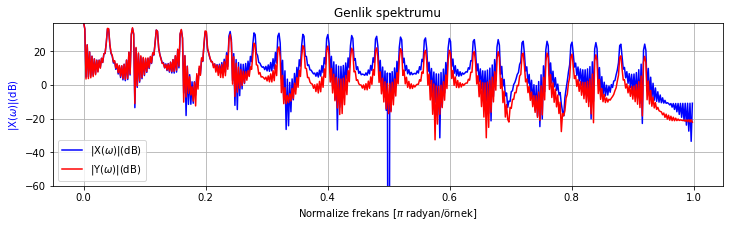

In [ ]:
spektrum_cizdir([test_sinyali_1, test_sinyali_1_filtrelenmis], sadece_genlik_cizdir=True)

Şekil Ek1.13: Test sinyali 1 ve FIR filtre ile ve filtrelenmiş sürümünün spektrumu

Spektrumda 0.25 normalize frekans ($\omega_c = 0.25 \pi$ radyan/örnek, $f_c = 0.25*(f_{örnekleme}/2)$ Hz) değerinden sonra genliğin azalmış olduğunu görebiliyoruz. 

Filtrenin dürtü cevabını tasarlarken zamanda kullanılan örnek sayısı arttıkça frekans cevabı ideal filtreye yaklaşacaktır ve geçiş bandı daralacaktır. Farklı uzunluktaki dürtü cevapları için elde edilen filtrelerin genlik spektrumlarını inceleyelim.

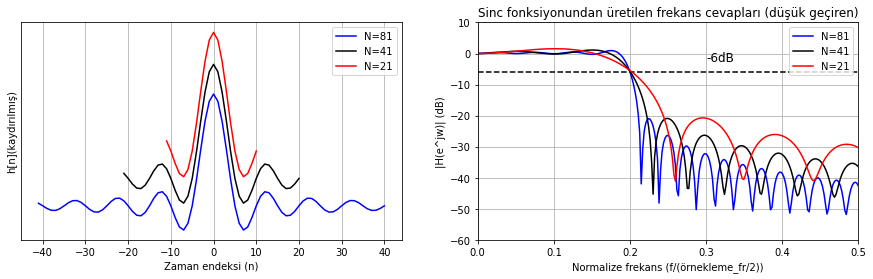

In [ ]:
fc = 2000 # Kesim frekansı Hz
ornekleme_fr = 20000 # Örnekleme frekansı Hz
max_fr = ornekleme_fr / 2
Wc = fc / max_fr

renkler = ['b','k','r','g','c']

plt.figure(figsize=(15,4))
for i, N in enumerate([81, 41, 21]):
  n = np.arange(-N//2,N//2+1)
  h_n = Wc * np.sinc(Wc * n)
  h_n /= np.sum(h_n)
  w, H = signal.freqz(h_n)
  plt.subplot(1,2,1);
  plt.plot(n, h_n+0.05*i, renkler[i], label='N={}'.format(N))#görüntülerin üstüste binmemesi için sinyale 0.05*i eklenerek kaydırılıyor
  plt.subplot(1,2,2);
  plt.plot(w/np.pi, 20 * np.log10(abs(H)), renkler[i], label='N={}'.format(N))

plt.subplot(1,2,1);
plt.grid(True)
plt.xlabel('Zaman endeksi (n)')
plt.ylabel('h[n](kaydırılmış)')
plt.yticks([], []);
plt.legend()
plt.subplot(1,2,2);
plt.ylim((-60,10))
plt.xlim((0,0.5))
plt.grid(True)
plt.legend()
plt.title('Sinc fonksiyonundan üretilen frekans cevapları (düşük geçiren)')
plt.xlabel('Normalize frekans (f/(örnekleme_fr/2))');
plt.ylabel('|H(e^jw)| (dB)');
plt.hlines(-6, 0, 1,linestyles='dashed');
plt.text(0.3, -2.5, '-6dB',fontsize=12);

Şekil Ek1.14: Farklı uzunluktaki sinc fonksiyonları ve spektrumları

Dürtü cevabı uzadıkça filtre frekans cevabının ideale daha fazla yaklaştığını görebiliyoruz. Bu dürtü cevaplarını sinc fonksiyonu uzunluğunu sınırlayarak, bir diğer ifadeyle kutu pencere ile çarparak elde etmiş olduk. Kutu pencere kullanmak yerine sinc fonksiyonunu keserken diğer pencereleme fonksiyonlarını kullanabilirdik. Bir sonraki örnekte kutu pencere kullanma veya Hamming pencere kullanma seçeneklerini karşılaştıralım.  

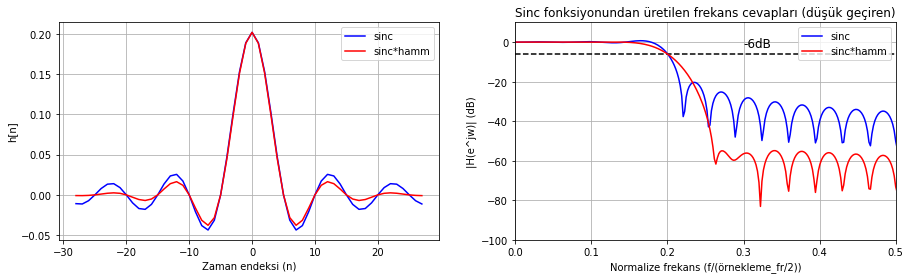

In [ ]:
fc = 2000 # Kesim frekansı Hz
ornekleme_fr = 20000 # Örnekleme frekansı Hz
max_fr = ornekleme_fr / 2
Wc = fc / max_fr

renkler = ['b','k','r','g','c']

plt.figure(figsize=(15,4))
N = 55
n = np.arange(-N//2,N//2+1)
h_n = Wc * np.sinc(Wc * n) 
h_n /= np.sum(h_n)
h_n_w = h_n * signal.get_window('hamm', N+1)#pencere ile çarpma işlemi
w, H = signal.freqz(h_n)
w, H_w = signal.freqz(h_n_w)

plt.subplot(1,2,1);
plt.plot(n, h_n, 'b', label='sinc')
plt.plot(n, h_n_w, 'r', label='sinc*hamm')
plt.grid(True)
plt.xlabel('Zaman endeksi (n)')
plt.ylabel('h[n]')
plt.legend()

plt.subplot(1,2,2);
plt.plot(w/np.pi, 20 * np.log10(abs(H)), 'b', label='sinc')
plt.plot(w/np.pi, 20 * np.log10(abs(H_w)), 'r', label='sinc*hamm')
plt.ylim((-100,10))
plt.xlim((0,0.5))
plt.grid(True)
plt.legend()
plt.title('Sinc fonksiyonundan üretilen frekans cevapları (düşük geçiren)')
plt.xlabel('Normalize frekans (f/(örnekleme_fr/2))')
plt.ylabel('|H(e^jw)| (dB)')
plt.hlines(-6, 0, 1,linestyles='dashed')
plt.text(0.3, -2.5, '-6dB',fontsize=12);

Şekil Ek1.15: Sinc fonksiyonu ve Hamming pencere ile çarpılmış sürümü dalga formları ve spektrumları

Hamming penceresiyle çarpıldığı durumda filtre cevabının geçirme bandında daha düz ve bastırma bandında bastırma oranının daha yüksek olduğunu görebiliyoruz. Buna karşılık geçiş bandı genişlemiş. scipy.signal.firwin yukarıdaki örnekte olduğu gibi sinc fonksiyonunu bir pencere fonksiyonuyla çarparak oluşturuyor. [Dökümantasyonu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) inceleyiniz. 

Sinc fonksiyonu ile yüksek geçiren filtre elde etmek için "spectral inversion" kullanabiliriz. Bu h[n]deki tüm değerlerin -1 ile çarpılması ve merkezdeki değere 1 eklenmesi ile mümkün.

Kaynak: https://tomroelandts.com/articles/how-to-create-a-simple-high-pass-filter

Benzer yöntemle diğer filtre türlerinin elde edilmesi için bakınız: https://tomroelandts.com/articles/how-to-create-simple-band-pass-and-band-reject-filters 

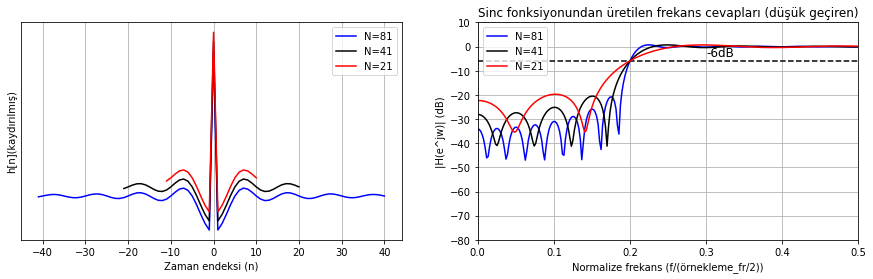

In [ ]:
fc = 2000 # Kesim frekansı Hz
ornekleme_fr = 20000 # Örnekleme frekansı Hz
max_fr = ornekleme_fr / 2
Wc = fc / max_fr

renkler = ['b','k','r','g','c']

plt.figure(figsize=(15,4))
for i, N in enumerate([81, 41, 21]):
  n = np.arange(-N//2,N//2+1)
  h_n = Wc * np.sinc(Wc * n)
  #Spectral inversion
  h_n *= -1
  h_n[n==0] += 1
  w, H = signal.freqz(h_n)
  plt.subplot(1,2,1);
  plt.plot(n, h_n+0.05*i, renkler[i], label='N={}'.format(N))#görüntülerin üstüste binmemesi için sinyale 0.05*i eklenerek kaydırılıyor
  plt.subplot(1,2,2);
  plt.plot(w/np.pi, 20 * np.log10(abs(H)), renkler[i], label='N={}'.format(N))

plt.subplot(1,2,1);
plt.grid(True)
plt.xlabel('Zaman endeksi (n)')
plt.ylabel('h[n](kaydırılmış)')
plt.yticks([], [])
plt.legend()
plt.subplot(1,2,2);
plt.ylim((-80,10))
plt.xlim((0,0.5))
plt.grid(True)
plt.legend()
plt.title('Sinc fonksiyonundan üretilen frekans cevapları (düşük geçiren)')
plt.xlabel('Normalize frekans (f/(örnekleme_fr/2))')
plt.ylabel('|H(e^jw)| (dB)')
plt.hlines(-6, 0, 1,linestyles='dashed')
plt.text(0.3, -4, '-6dB',fontsize=12);

Şekil Ek1.16: "Spectral Inversion" metoduyla sinc fonksiyonundan oluşturulan yüksek geçiren filtre dürtü cevabı dalga formları (çeşitli uzunlukta)  ve frekans (genlik) cevapları

Şimdi [scipy.signal.firwin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) ile farklı uzunlukta filtre dürtü cevapları oluşturup karşılaştıralım, sonra da test sinyallerinden birine uygulayalım.

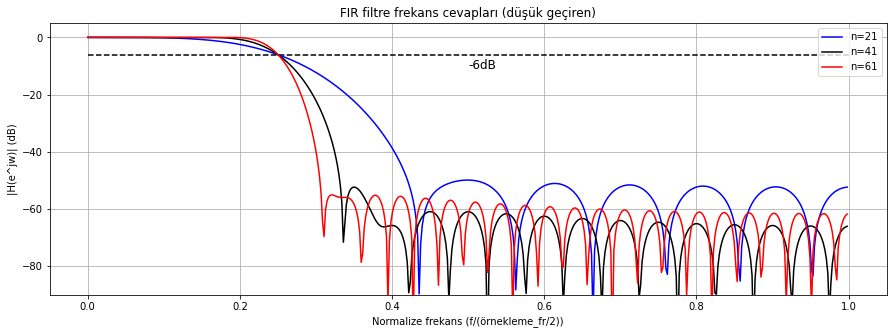

In [ ]:
fc = 1250 # Kesim frekansı Hz
ornekleme_fr = 10000 # Hz
max_fr = ornekleme_fr / 2
Wc = fc / max_fr
renkler = ['b','k','r','g','c']

plt.figure(figsize=(15,5))
for i, n in enumerate([21, 41, 61]):
  h_n = signal.firwin(n, Wc)
  w, H = signal.freqz(h_n)
  plt.plot(w/np.pi, 20 * np.log10(abs(H)), renkler[i], label='n={}'.format(n))

plt.ylim((-90,5))
plt.grid(True)
plt.legend()
plt.title('FIR filtre frekans cevapları (düşük geçiren)')
plt.xlabel('Normalize frekans (f/(örnekleme_fr/2))')
plt.ylabel('|H(e^jw)| (dB)')
plt.hlines(-6, 0, 1,linestyles='dashed')
plt.text(0.5, -11, '-6dB',fontsize=12);


Şekil Ek1.16: scipy.signal.firwin fonksiyonu kullanılarak oluşturulan yüksek geçiren filtre frekans (genlik) cevapları

61 örnekli filtreyikullanarak test sinyali 1'i filtrelemeyi deneyelim: 

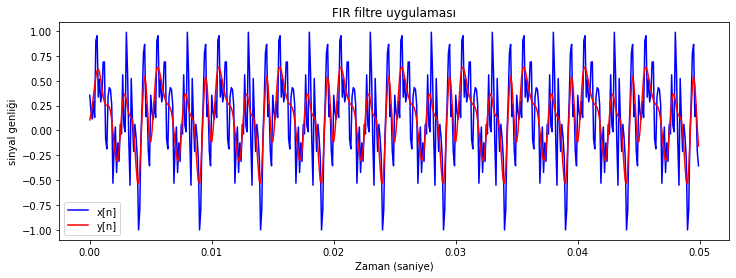

In [ ]:
N = 61; Wc = 0.25
test_sinyali_1_filtrelenmis = np.convolve(test_sinyali_1, signal.firwin(N, Wc))

# Konvolüsyon işlemi ile elde edilen sinyale baş ve son kısmında N/2 örnek eklendiği için çıkartıp çizdirelim
test_sinyali_1_filtrelenmis = test_sinyali_1_filtrelenmis[N//2:N//2+test_sinyali_1.size]
dalga_formu_cizdir([test_sinyali_1, test_sinyali_1_filtrelenmis], test_sinyali_1_ornekleme_fr) 
plt.title('FIR filtre uygulaması');

Şekil Ek1.17: Test sinyali 1 ve FIR filtre ile filtrelenmiş sürümünün dalga formu 

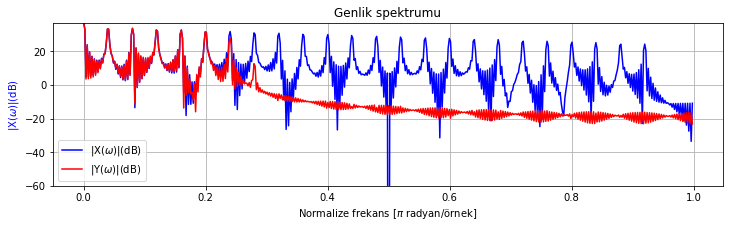

In [ ]:
spektrum_cizdir([test_sinyali_1, test_sinyali_1_filtrelenmis], sadece_genlik_cizdir=True)

Şekil Ek1.18: Test sinyali 1 ve FIR filtre ile filtrelenmiş sürümünün genlik spektrumu 

Spektrumda 0.25 normalize frekans değerinden sonra genliğin oldukça azalmış olduğunu görebiliyoruz. Bir önceki örneğimizde filtre uzunluğu bu örnekte kullandığımızın yarısı kadardı ve filtre daha az baskılama gerçekleştiriyordu.

Filtre spektrumunu daha hassas bir şekilde kontrol etmek isterseniz [scipy.signal.firwin2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin2.html) fonksiyonunu kullanabilirsiniz. Bu fonksiyon kullanıcıya hangi frekans noktalarında hangi kazançları istediğini belirlemeye imkan tanıyor. Alttaki kodu ve oluşturulan çizimi inceleyiniz.

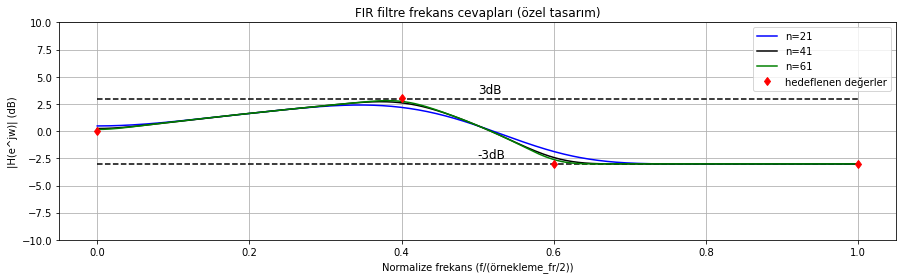

In [ ]:
frekans_noktalari = np.array([0.0, 0.4, 0.6, 1.0])
frekans_noktalarindaki_kazanc = np.array([1.0, pow(2.0,1/2), 1/pow(2.0,1/2), 1/pow(2.0,1/2)])

renkler = ['b','k','g','c']

plt.figure(figsize=(15,4))
for i, n in enumerate([21, 41, 61]):
  h_n = signal.firwin2(n, frekans_noktalari, frekans_noktalarindaki_kazanc)
  w, H = signal.freqz(h_n)
  plt.plot(w/np.pi, 20 * np.log10(abs(H)), renkler[i], label='n={}'.format(n))

plt.plot(frekans_noktalari, 20 * np.log10(frekans_noktalarindaki_kazanc),'rd', label='hedeflenen değerler')
plt.ylim((-10,10))

plt.grid(True)
plt.legend()
plt.title('FIR filtre frekans cevapları (özel tasarım)')
plt.xlabel('Normalize frekans (f/(örnekleme_fr/2))')
plt.ylabel('|H(e^jw)| (dB)')
plt.hlines(-3, 0, 1,linestyles='dashed')
plt.hlines(3, 0, 1,linestyles='dashed')
plt.text(0.5, -2.5, '-3dB',fontsize=12);
plt.text(0.5, 3.5, '3dB',fontsize=12);


Şekil Ek1.19: scipy.signal.firwin2 fonksiyonu ile tasarlanmış özel bir filtrenin frekans(genlik) cevabı (çeşitli uzunlukta dürtü cevapları için) 

FIR filtreleri genel olarak ele almış olduk, şimdi IIR filtreleri ele alabiliriz.

##  IIR filtre tasarımı

FIR filtreleri tasarlarken filtrenin dürtü cevabını oluşturduk ve filtreyi sinyali dürtü cevabı ile konvolüsyona tabi tutarak uyguladık. IIR filtreler için dürtü cevabımız sonsuz uzunlukta. Tasarımda $b$ ve $a$ katsayılarını hesaplayacak ve filtreyi [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) fonksiyonunu bu katsayılarla kullanarak uygulayacağız. Yine çeşitli derecelerde oluşturulan filtrelerin spektrumlarını karşılaştıralım ve test sinyallerimize uygulayalım.

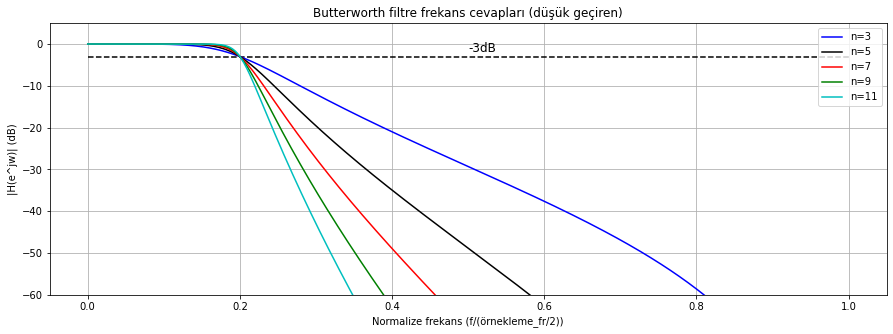

In [ ]:
fc = 2000 # Hz
ornekleme_fr = 20000 # Hz
max_fr = ornekleme_fr / 2
Wc = fc / max_fr
renkler = ['b','k','r','g','c']

plt.figure(figsize=(15,5))
for i, n in enumerate(range(3,13,2)):
  b, a = signal.butter(n, Wc)
  w, h = signal.freqz(b, a)
  plt.plot(w/np.pi, 20 * np.log10(abs(h)), renkler[i], label='n={}'.format(n))

plt.ylim((-60,5))
plt.hlines(-3, 0, 1,linestyles='dashed')
plt.grid(True)
plt.legend()
plt.title('Butterworth filtre frekans cevapları (düşük geçiren)')
plt.xlabel('Normalize frekans (f/(örnekleme_fr/2))')
plt.ylabel('|H(e^jw)| (dB)')
plt.text(0.5, -2, '-3dB',fontsize=12);

Şekil Ek1.20: scipy.signal.butter fonksiyonu ile tasarlanmış IIR filtre frekans(genlik) cevabı (çeşitli dereceler(n) için) 

Spektrumları incelediğimizde filtrenin derecesi ($n$) arttıkça filtrenin ideal filtre cevabına yaklaştığını gözlüyoruz. Elbette polinom derecelerindeki bu artış işlem maliyetini de artırmaktadır. 

Daha önce FIR filtre uygulaması olarak test-sinyali-1'e 0.25 normalize kesim frekanslı düşük geçiren filtre uygulamıştık. Aynı işlemi IIR filtre ile deneyelim.

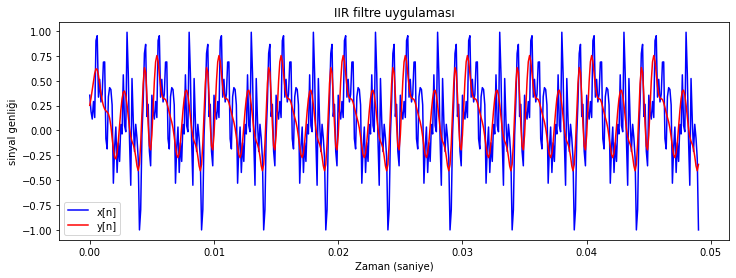

In [ ]:
Wc = 0.25
n = 9
b, a = signal.butter(n, Wc)
test_sinyali_1_filtrelenmis = signal.lfilter(b, a, test_sinyali_1)

dalga_formu_cizdir([test_sinyali_1[:-n], test_sinyali_1_filtrelenmis[n:]], test_sinyali_1_ornekleme_fr)
plt.title('IIR filtre uygulaması');

Şekil Ek1.21: Test sinyali 1 ve IIR filtre ile filtrelenmiş sürümünün dalga formu

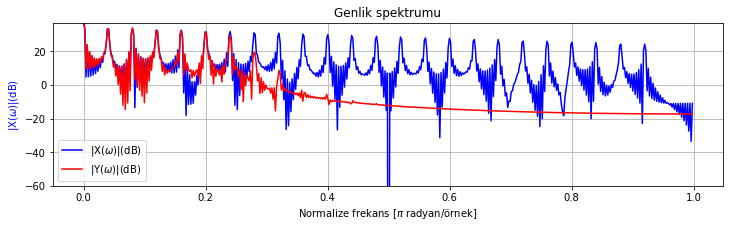

In [ ]:
spektrum_cizdir([test_sinyali_1, test_sinyali_1_filtrelenmis], sadece_genlik_cizdir=True)

Şekil Ek1.22: Test sinyali 1 ve IIR filtre ile filtrelenmiş sürümünün genlik spektrumu 

Şekil Ek1.18 ve Ek1.22 ve kullanılan filtre derecelerini karşılaştırsanız IIR filtre kullandığımız durumda daha düşük dereceli filtre ile benzer sonucu elde ettiğimizi görebilirsiniz.

Spektrumları incelediğimizde hedeflenilen filtreleme işlemi gerçekleştirilmiş olmakla beraber elde edilen dalga formunun orijinal sinyalin dalga formuyla senkronizasyonunda bir miktar uyumsuzluk gözlüyoruz. Bunun sebebi IIR filtrenin faz cevabının doğrusal olmayışı. Sistem frekans cevabının fazının çıktı sinyaline etkisini 2. defterimizde ele almıştık. Filtrenin frekans cevabını çizdirip inceleyelim.

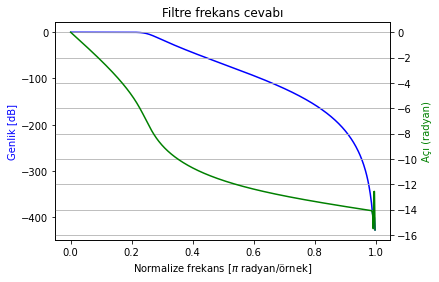

In [ ]:
frekans_cevabi_cizdir(b, a)

Şekil Ek1.22: Düşük geçiren IIR filtre frekans cevabı

Geçirme bölgesinde büyük oranda doğrusal olmakla beraber kesim frekansına ($0.25\pi$ *radyan/örnek*) yakın bölgelerde faz doğrusallığını kaybediyor. Bazı bileşenler zamanda diğer bileşenlere göre kaymış durumdalar. Bu tür durumlarda fazda gerçekleşen bozulmayı düzeltmek için eldeki filtre bir kez daha, bu sefer sinyalin zamanda ters çevirilmiş haline uygulanıp çıktı sinyali zamanda tekrar ters çevirilebilir. Bu bileşenlerin zamanda farklı miktarlarda kayma durumunu (bir de ters yönde kaydırarak) düzeltecektir. Sinyal işleme kütüphanelerinde çoğunlukla bu işlem için de bir fonksiyon bulunur. Altta scipy.signal kütüphanesinde bu amaçla sunulmuş [filtfilt](scipy.signal.filtfilt) fonksiyonu kullanalım. 

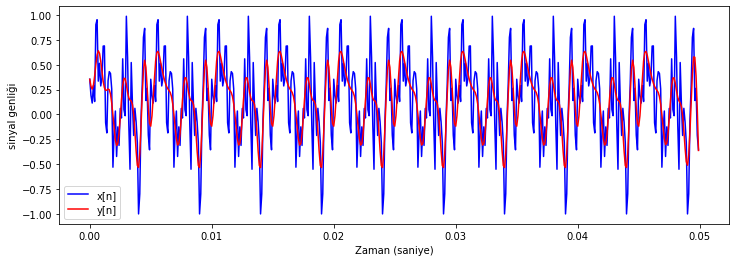

In [ ]:
test_sinyali_1_filtrelenmis = signal.filtfilt(b, a, test_sinyali_1)

dalga_formu_cizdir([test_sinyali_1, test_sinyali_1_filtrelenmis], test_sinyali_1_ornekleme_fr)

Şekil Ek1.23: Test sinyali 1 ve IIR filtre ile filtfilt fonksiyonu kullanılarak filtrelenmiş sürümünün dalga formu

İki şekli karşılaştırırsanız zamanda dalga formu örtüşmesinin daha iyi olduğunu göreceksiniz.

Şimdi yüksek geçiren IIR filtre tasarımını örneklendirelim:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


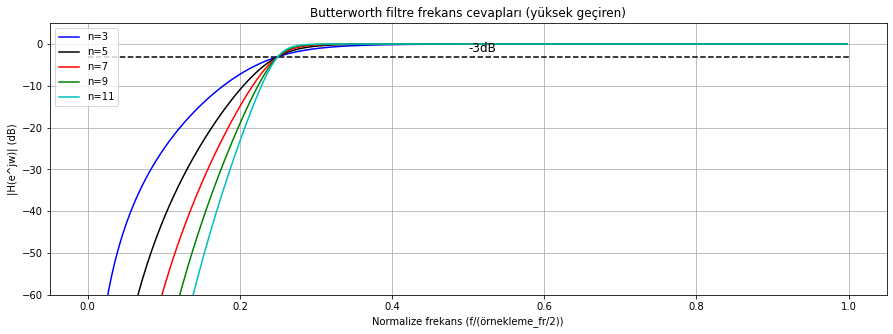

In [ ]:
plt.figure(figsize=(15,5))
for i, n in enumerate(range(3,13,2)):
  b, a = signal.butter(n, Wc, 'high')
  w, h = signal.freqz(b, a)
  plt.plot(w/np.pi, 20 * np.log10(abs(h)), renkler[i], label='n={}'.format(n))

plt.ylim((-60,5))
plt.hlines(-3, 0, 1,linestyles='dashed')
plt.grid(True)
plt.legend()
plt.title('Butterworth filtre frekans cevapları (yüksek geçiren)')
plt.xlabel('Normalize frekans (f/(örnekleme_fr/2))')
plt.ylabel('|H(e^jw)| (dB)')
plt.text(0.5, -2, '-3dB',fontsize=12);

Şekil Ek1.24: scipy.signal.butter fonksiyonu ile tasarlanmış yüksek geçiren IIR filtre frekans(genlik) cevabı (çeşitli dereceler(n) için)

Şimdi bant geçiren IIR filtre tasarımını örneklendirelim:

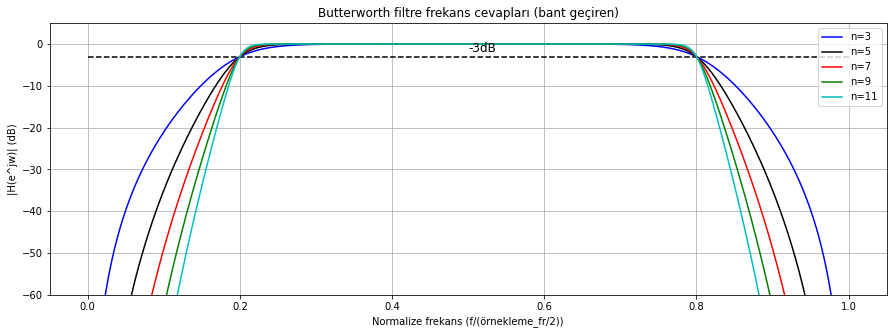

In [ ]:
Wc = [0.2,0.8]
plt.figure(figsize=(15,5))
for i, n in enumerate(range(3,13,2)):
  b, a = signal.butter(n, Wc, 'bandpass')
  w, h = signal.freqz(b, a)
  plt.plot(w/np.pi, 20 * np.log10(abs(h)), renkler[i], label='n={}'.format(n))

plt.ylim((-60,5))
plt.hlines(-3, 0, 1,linestyles='dashed')
plt.grid(True)
plt.legend()
plt.title('Butterworth filtre frekans cevapları (bant geçiren)')
plt.xlabel('Normalize frekans (f/(örnekleme_fr/2))')
plt.ylabel('|H(e^jw)| (dB)')
plt.text(0.5, -2, '-3dB',fontsize=12);

Şekil Ek1.25: scipy.signal.butter fonksiyonu ile tasarlanmış bant geçiren IIR filtre frekans(genlik) cevabı (çeşitli dereceler(n) için)

IIR filtre tasarımı için tek opsiyonumuz Butterwordth filtre tasarım yöntemi değil. Çoğu sinyal işleme kütüphanesinde Chebyshev filtre, eliptik filtre tasarımı için de fonksiyonlar bulunur. Bu tasarım yöntemleri arasındaki karşılaştırma için [bakınız](http://matlab.izmiran.ru/help/toolbox/signal/filterd5.html).

Chebyshev-1 türü filtrelerde geçirme bandında belirli düzeyde dalgalanmalara izin verilerek filtrenin geçiş bandının daha dar (kesim frekansında cevabın daha dik) olması sağlanmakta, kullanıcıya bu parametreleri belirleme şansı tanınmaktadır. Aşağıda farklı miktarlardaki dalgalanma tolerans değerleri ($rp$ parametresi) için filtreler tasarlayıp spektrumlarını karşılaştırıyoruz. 

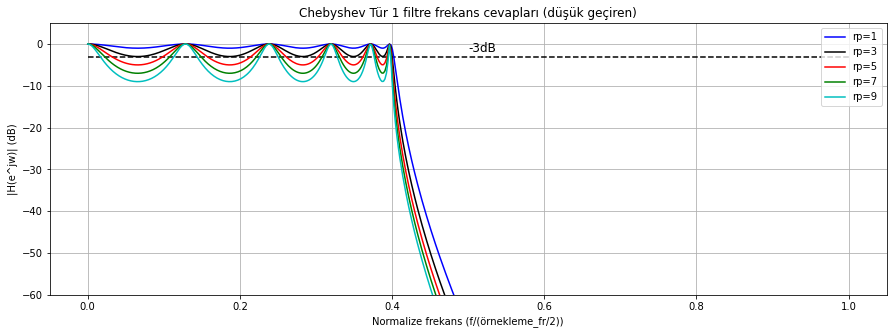

In [ ]:
fc = 4000 # Hz
ornekleme_fr = 20000 # Hz
max_fr = ornekleme_fr / 2
Wc = fc / max_fr
renkler = ['b','k','r','g','c']

plt.figure(figsize=(15,5))
for i, rp in enumerate(np.arange(1,10,2)):
  b, a = signal.cheby1(n, rp, Wc)
  w, h = signal.freqz(b, a)
  plt.plot(w/np.pi, 20 * np.log10(abs(h)), renkler[i], label='rp={}'.format(rp))

plt.ylim((-60,5))
plt.hlines(-3, 0, 1,linestyles='dashed')
plt.grid(True)
plt.legend()
plt.title('Chebyshev Tür 1 filtre frekans cevapları (düşük geçiren)')
plt.xlabel('Normalize frekans (f/(örnekleme_fr/2))')
plt.ylabel('|H(e^jw)| (dB)')
plt.text(0.5, -2, '-3dB',fontsize=12);

Şekil Ek1.26: scipy.signal.cheby1 fonksiyonu ile tasarlanmış düşük geçiren IIR filtre frekans(genlik) cevabı (çeşitli geçirme bandı dalgalanma toleransı ($rp$) değerleri için)

Dalgalanma tolearnsı arttıkça filtre daha keskinleşiyor.

Chebyshev-2 türü filtrelerde ise bastırma bandında belirli düzeyde dalgalanmalara izin verilerek filtrenin geçiş bandının daha dar (kesim frekansında cevabın daha dik) olması sağlanmaktadır. Bu tasarımda bastırma bandında ne kadar bastırma istediğimizi bir parametre ile belirlemekteyiz: $rs$. Aşağıda farklı miktarlardaki minimum bastırma değerleri ( $rs$  parametresi) için filtreler tasarlayıp spektrumlarını karşılaştırıyoruz.

Text(0, 0.5, '|H(e^jw)| (dB)')

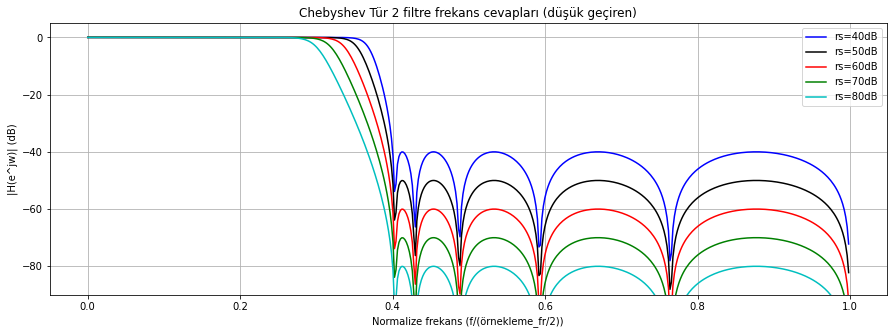

In [ ]:
fc = 4000 # Hz
ornekleme_fr = 20000 # Hz
max_fr = ornekleme_fr / 2
Wc = fc / max_fr
renkler = ['b','k','r','g','c']

plt.figure(figsize=(15,5))
for i, rs in enumerate(np.arange(40,90,10)):
  b, a = signal.cheby2(n, rs, Wc)
  w, h = signal.freqz(b, a)
  plt.plot(w/np.pi, 20 * np.log10(abs(h)), renkler[i], label='rs={}dB'.format(rs))

plt.ylim((-90,5))
#plt.hlines(-3, 0, 1,linestyles='dashed')
plt.grid(True)
plt.legend()
plt.title('Chebyshev Tür 2 filtre frekans cevapları (düşük geçiren)')
plt.xlabel('Normalize frekans (f/(örnekleme_fr/2))')
plt.ylabel('|H(e^jw)| (dB)')
#plt.text(0.5, -2, '-3dB',fontsize=12);

Şekil Ek1.27: scipy.signal.cheby2 fonksiyonu ile tasarlanmış düşük geçiren IIR filtre frekans(genlik) cevabı (çeşitli minimum bastırma değerleri ($rs$) için)

Bastırma miktarı arttıkça filtre keskinliği azalıyor. 

Son olarak eliptik filtreler için örnek sunalım. Eliptik filtrelerde hem geçirme hem de baskılama bandında dalgalanmaya izin verilip bu sayede filtre frekans cevabının daha dik olması sağlanmaktadır. 

Text(0, 0.5, '|H(e^jw)| (dB)')

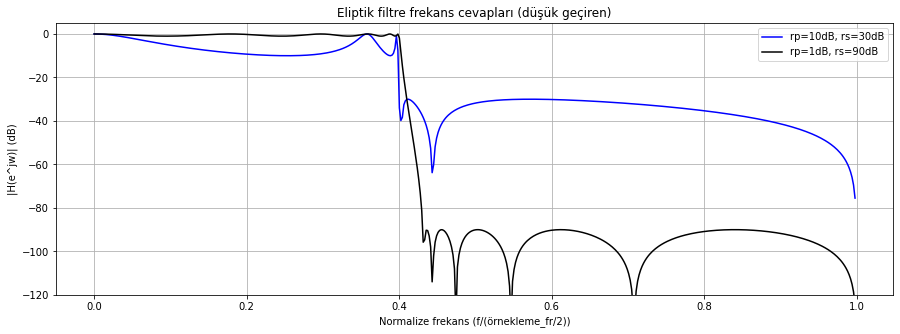

In [ ]:
fc = 4000 # Hz
ornekleme_fr = 20000 # Hz
max_fr = ornekleme_fr / 2
Wc = fc / max_fr
renkler = ['b','k','r','g','c']

plt.figure(figsize=(15,5))
for i, rp, rs in zip([0,1],[10,1], [30,90]):
  b, a = signal.ellip(n, rp, rs, Wc)
  w, h = signal.freqz(b, a)
  plt.plot(w/np.pi, 20 * np.log10(abs(h)), renkler[i], label='rp={}dB, rs={}dB'.format(rp,rs))

plt.ylim((-120,5))
#plt.hlines(-3, 0, 1,linestyles='dashed')
plt.grid(True)
plt.legend()
plt.title('Eliptik filtre frekans cevapları (düşük geçiren)')
plt.xlabel('Normalize frekans (f/(örnekleme_fr/2))')
plt.ylabel('|H(e^jw)| (dB)')
#plt.text(0.5, -2, '-3dB',fontsize=12);

Şekil Ek1.28: scipy.signal.ellip fonksiyonu ile tasarlanmış düşük geçiren IIR filtre frekans(genlik) cevabı (çeşitli parametre değerleri için)

Ele aldığımız son örnekleri şu şekilde özetleyebiliriz: filtre tasarımında bir özellikte iyileşme istediğimizde diğer özellikten taviz vermek durumunda kalırız. Örneğin filtrenin keskin olmasını istediğimizde geçirme bandında veya bastırma bandında dalgalanmaya izin vermek durumunda kalırız. Her sinyal işleme problemi için gereklilikler farklı olacaktır. Filtre tasarım araçlarını tanır ve kontrol edebildiğimiz parametreleri bilirsek çoğu durumda birkaç dene-yanıl işleminden sonra uygun filtreyi elde etmek mümkündür. Defterimizde, buraya kadar olan kısımda en yaygın kullanılan filtre tasarım fonksiyonlarını kısaca ele almış olduk. Son olarak aşağıda bir kaç uygulama örneği ele alıyoruz. 

##  Filtre uygulama problemleri için örnek çözümler

Yukarıda dört ayrı test sinyali için birer filtre uygulama problemi tanımlamıştık. Burada o problemlerden bazıları için örnek çözümler sunuyoruz. 

### Problem/egzersiz 1

Test sinyali 1 üzerinde tanımlanmış 1. problemi hem FIR filtre kullanarak hem de IIR filtre kullanarak çözmeye çalışalım. Amacımız 150-250 Hz arasındaki ana bileşen harmoniği izole etmeyi sağlayacak bir filtrenin tasarımıydı. Bunu bant- geçiren bir filtre ile gerçekleştirebiliriz. Öncelikle FIR filtre kullanalım:

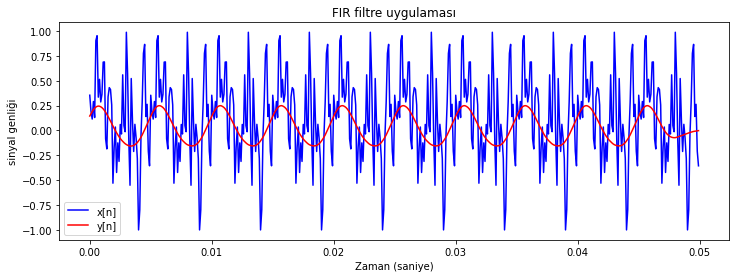

In [ ]:
N = 81; 
f_max = test_sinyali_1_ornekleme_fr / 2
Wc = [150/f_max, 250/f_max]
h_n = signal.firwin(N, Wc,pass_zero='bandpass') # filtre dürtü cevabı
test_sinyali_1_filtrelenmis = np.convolve(test_sinyali_1, h_n)

# Konvolüsyon işlemi ile elde edilen sinyale baş ve son kısmında N/2 örnek eklendiği için çıkartıp çizdirelim
test_sinyali_1_filtrelenmis = test_sinyali_1_filtrelenmis[N//2:N//2+test_sinyali_1.size]
dalga_formu_cizdir([test_sinyali_1, test_sinyali_1_filtrelenmis], test_sinyali_1_ornekleme_fr) 
plt.title('FIR filtre uygulaması');

Şekil Ek1.29: Test sinyali 1 ve FIR filtre ile filtrelenmiş sürümünün dalga formu

Filtrelenmiş sinyalin ana bileşen olduğunu ve sinyalle senkron olduğunu görebiliyoruz. Spektrumunu da inceleyelim.

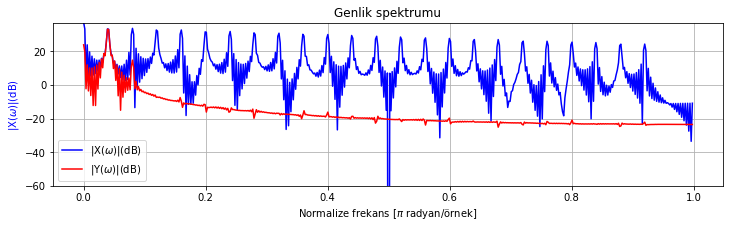

In [ ]:
spektrum_cizdir([test_sinyali_1, test_sinyali_1_filtrelenmis], sadece_genlik_cizdir=True)

Şekil Ek1.30: Test sinyali 1 ve FIR filtre ile filtrelenmiş sürümünün genlik spektrumu

Spektrumda da hedefe ulaştığımızı doğrulayabiliyoruz: ana bileşen dışındakilerin enerjisi oldukça düşürülmüş.

Şimdi IIR filtre kullanarak yapalım. Doğrusal olmayan faz etkisinden kurtulmak için filtreyi uygularken scipy.signal.filtfilt fonksiyonunu kullanacağız:

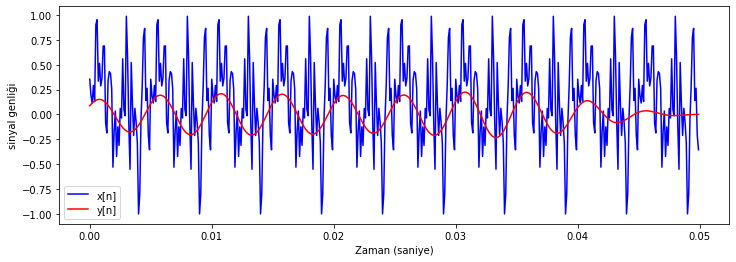

In [ ]:
n = 5
b, a = signal.butter(n, Wc, btype='bandpass')

test_sinyali_1_filtrelenmis = signal.filtfilt(b, a, test_sinyali_1)
dalga_formu_cizdir([test_sinyali_1, test_sinyali_1_filtrelenmis], test_sinyali_1_ornekleme_fr) 


Şekil Ek1.31: Test sinyali 1 ve IIR filtre ile filtrelenmiş sürümünün dalga formu

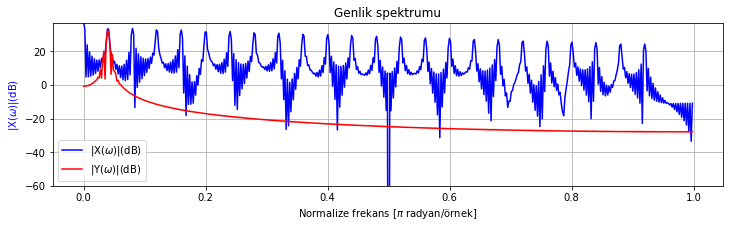

In [ ]:
spektrum_cizdir([test_sinyali_1, test_sinyali_1_filtrelenmis], sadece_genlik_cizdir=True)

Şekil Ek1.32: Test sinyali 1 ve IIR filtre ile filtrelenmiş sürümünün genlik spektrumu

Hem FIR hem de IIR ile hedefimize ulaştık. IIR filtre için çok daha düşük derece kullandık. 

### Problem/egzersiz 2

Test sinyali 2 için bir bant-geçiren filtre tasarlayıp hem yüksek hem de düşük frekans gürültü bileşenlerinden kurtulmayı hedefleyebiliriz. IIR filtre kullanarak gerçekleştirmeye çalışalım:

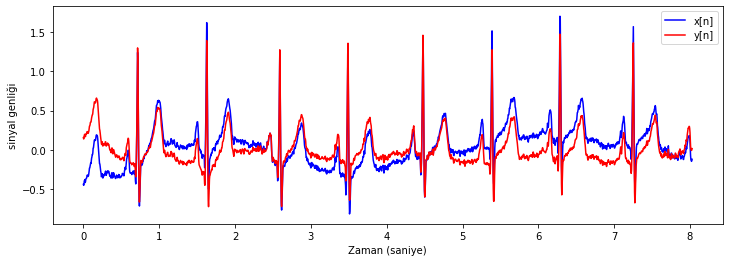

In [ ]:
f_max = test_sinyali_2_ornekleme_fr / 2
# Figürden düşük frekanslı gürültünün 3-4 saniye periyodlu olduğunu görüyoruz
T0_gurultu = 2.5 # periyod: saniye, frekansın biraz yüksek olması için periyod gözlemden biraz küçük alındı 
f0_gurultu = 1 / T0_gurultu
Wc_alt = f0_gurultu/f_max
Wc_ust = 0.7 # yuksek frekans gürültüsünü spektrumdan gözlemek zor görünüyor, dene-yanıl ile atanmış bir değer kullanalım
n = 7
Wc = [Wc_alt, Wc_ust]
b, a = signal.butter(n, Wc, btype='bandpass')

test_sinyali_2_filtrelenmis = signal.filtfilt(b, a, test_sinyali_2)
dalga_formu_cizdir([test_sinyali_2, test_sinyali_2_filtrelenmis], test_sinyali_2_ornekleme_fr) 


Şekil Ek1.33: Test sinyali 2 ve IIR filtre ile filtrelenmiş sürümünün dalga formu

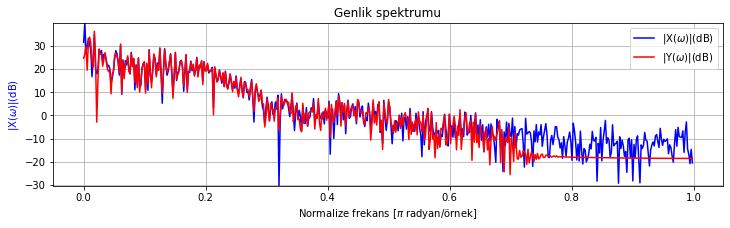

In [ ]:
spektrum_cizdir([test_sinyali_2, test_sinyali_2_filtrelenmis], sadece_genlik_cizdir=True)

Şekil Ek1.34: Test sinyali 2 ve IIR filtre ile filtrelenmiş sürümünün genlik spektrumu

Filtrelenmiş sinyalin dalga formunu incelediğimizde düşük frekanslı gürültü bileşeninden büyük oranda kurtulduğumuzu ancak yüksek frekanslı gürültülerde azaltma miktarının az olduğunu görüyoruz. Daha fazla baskılama için parametreleri değiştirerek kendiniz testler yapınız.

### Problem/egzersiz 3

Test sinyali 3 için tanımlanmış problemimizi ele alalım.

Öncelikle soruda tanımlanmış filtreleri tasarlayalım. Şekil Ek1.10'da kesim frekansları 310 Hz ve 3100 Hz olarak verilmiş. 

<img src="https://electro-dan.co.uk/electronics/subwoofer/p09_fig2.gif" width=350/>

Şekil Ek1.10: 3 yollu "equalizer" filtre frekans cevapları

Üç adet filtre tasarlamalıyız: 1) 310 Hz kesim frekanslı bir düşük geçiren filtre, 2) 310 Hz ve 3100 Hz kesim frekanslı bir bant-geçiren filtre, 3) 3100 Hz kesim frekanslı bir yüksek geçiren filtre 

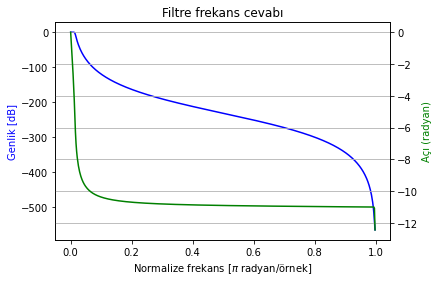

In [ ]:
# 1. filtre
n = 7
f_max = test_sinyali_3_ornekleme_fr/2
Wc = 310 / f_max
b_low, a_low = signal.butter(n, Wc, btype='lowpass')
frekans_cevabi_cizdir(b_low, a_low)

Şekil Ek1.35: Bas bileşenleri değiştirmek için kullanılacak düşük geçiren filtre cevabı

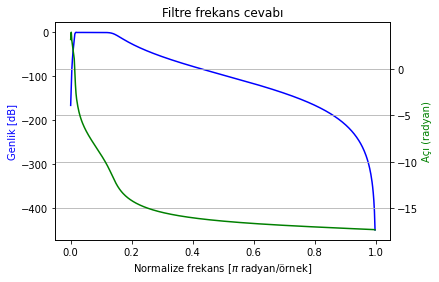

In [ ]:
# 2. filtre
Wc = [310/f_max, 3100/f_max]
b_mid, a_mid = signal.butter(n, Wc, btype='bandpass')
frekans_cevabi_cizdir(b_mid, a_mid)

Şekil Ek1.36: Mid bileşenleri değiştirmek için kullanılacak bant geçiren filtre cevabı

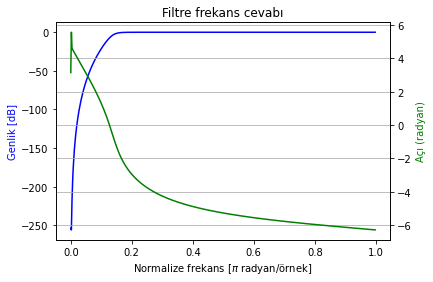

In [ ]:
# 3. filtre
Wc = 3100 / f_max
b_high, a_high = signal.butter(n, Wc, btype='highpass')
frekans_cevabi_cizdir(b_high, a_high)

Şekil Ek1.37: Tiz bileşenleri değiştirmek için kullanılacak yüksek geçiren filtre cevabı

Her bir filtremizin geçiş bandında kazancının 0 dB olduğunu görebiliyoruz. Artırma işlemleri için sinyalin filtrelenmiş halini berlili bir kazançla çarpıp sinyale toplayarak hedefimize ulaşabiliriz. Örneğin a şıkkında belirtilen: 'Basları 10 dB açılmış sinyal'i olusturmak için bas bölgesinin sinyalini filtreleyerek elde edip daha sonra belirli bir kazançla çarpıp sinyale toplayalım:

In [ ]:
# Desibel - oran dönüşüm heaplayan fonksiyon
def db_den_oran(dB_kazanc):
  return pow(10, (dB_kazanc/20))

test_sinyali_3_bas = signal.filtfilt(b_low, a_low, test_sinyali_3)
dB_kazanc = 10 # soruda 10 dB kazanc hedeflenmiş
carpan = db_den_oran(dB_kazanc) - 1 # sinyalin kendi üzerine toplanacağı için 1 çıkardık
test_sinyali_3_bas_artmis = test_sinyali_3 + test_sinyali_3_bas * carpan
spektrum_cizdir([test_sinyali_3, test_sinyali_3_bas_artmis], sadece_genlik_cizdir=True)
Audio(test_sinyali_3_bas_artmis, rate=test_sinyali_3_ornekleme_fr)

Output hidden; open in https://colab.research.google.com to view.

Şekil Ek1.38: Test sinyali 3 ve EQ filtre kullanılarak basları artırılmış sinyalin genlik spektrumu

Kulaklık ile dinleyerek kaydın orijinali ile karşılaştırdığınızda kayıtta basların yükseldiğini duyacaksınız. 

Sorudaki $b$ ve $c$ şıklarını kendiniz yapmaya çalışınız.

### Problem/egzersiz 4

Test sinyali 4 için tanımlanmış problemi ele alalım:

Sinyalin spektrumunu incelediğimizde yaklaşık olarak 0.47 ve 0.72 normalize frekans aralığında yüksek frekans gürültüsü etkisini gözlüyoruz. O bölgeleri bastıran bir filtre tasarlayıp kullanalım

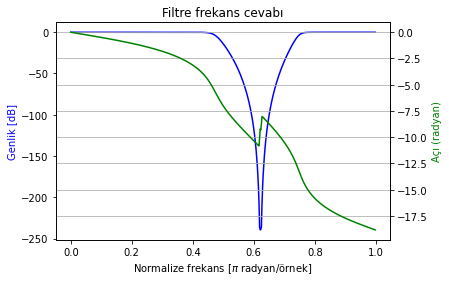

In [ ]:
n = 7
Wc = [0.47, 0.75]
b, a = signal.butter(n, Wc, btype='bandstop')
frekans_cevabi_cizdir(b, a)

Şekil Ek1.39: Bant-sınırlı gürültü bastırmak için kullanılacak bant bastıran filtre cevabı

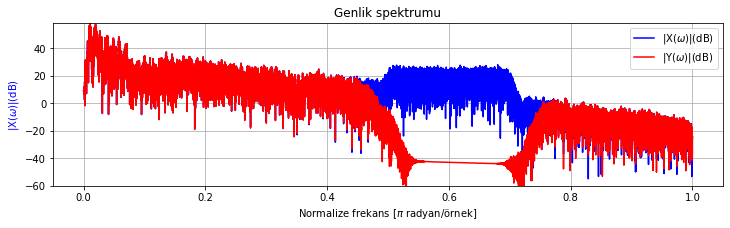

In [ ]:
test_sinyali_4_filtrelenmis = signal.filtfilt(b, a, test_sinyali_4)
spektrum_cizdir([test_sinyali_4, test_sinyali_4_filtrelenmis], test_sinyali_4_ornekleme_fr, sadece_genlik_cizdir=True) 
Audio(test_sinyali_4_filtrelenmis, rate=test_sinyali_4_ornekleme_fr)

Şekil Ek1.40: Test sinyali 4 ve bant bastıran filtre kullanılarak filtrelenmiş sinyalin genlik spektrumu

Filtrelenmiş ve orijinal sinyal kayıtlarını kulaklık ile dinleyiniz. Gürültüde azalma oldu mu?

**Önerilen kaynaklar:**

*   "Python for Signal Processing: Featuring IPython Notebooks" (José Unpingco) defterleri:
[Filtreleme-Bölüm1](https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Filtering.ipynb), 
[Filtreleme-Bölüm2](https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Filtering_Part2.ipynb), 
[Filtreleme-Bölüm3](https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Filtering_Part3.ipynb)
*   [Jeff Fessler ders notları, Bölüm 8, Sayısal Filtre Tasarımı](https://web.eecs.umich.edu/~fessler/course/451/l/pdf/c8.pdf)
*   [Filtre tasarımı (Brian McFee)](https://brianmcfee.net/dstbook-site/content/ch10-convtheorem/FilterDesign.html)

*   [scikit-dsp-comm filtre tasarım dökümanı](https://scikit-dsp-comm.readthedocs.io/en/stable/nb_examples/FIR_and_IIR_Filter_Design.html )

*   [ECE 4680 DSP Lab notları (Dr. Semiari Wickert)](http://ece.uccs.edu/~mwickert/ece4680/lecture_notes/Lab5_f2016.pdf)





**Egzersiz önerileri:**

[MIT-Biomedical Signal and Image Processing Labs](https://ocw.mit.edu/courses/hst-582j-biomedical-signal-and-image-processing-spring-2007/pages/labs/) , [Lab-1 ECG sinyal işleme](https://ocw.mit.edu/courses/hst-582j-biomedical-signal-and-image-processing-spring-2007/d488a43192bf9e1059c89bc756e7c16a_lab1_ecg.pdf), "3.2 Week 1: Signal Conditioning/Noise Reduction" içeriğinde tanımlı problemi çözmeye çalışınız. 

**Test sinyellerini oluşturan kodlar:**

**Test sinyali 1: Harmonik sinyal.**

İlk sinyalimizi enerjisi giderek azalan harmonikler içeren bir sinyal olarak sentezleyelim.
$x[n] = \sum_{k = 0}^{N}A[k]cos(2\pi f_0 k+θ_k)$
$A[k] = \alpha^k, \alpha = 0.95$

In [ ]:
random.seed(1) # fazları rasgele seçeceğiz, rasgeleliği kontrol için ekledik

ornekleme_fr = 10000 # örnekleme frekansı: 10kHz
f0 = 200 # temel titreşim frekansı: 200 Hz
dalga_sayisi = 10 # 10 tam dalga boyu uzunluğunda sinyal oluşturacağız
harmonik_sayisi = (ornekleme_fr/2) / f0 - 1

# Tam kat frekanslarda(0*f0, 1*f0, 2*f0, vb.) harmonik bileşenlerin genlikleri 
#  azalan üstel bir fonksiyonun değerleri olarak belirleyelim 
alfa = 0.95
A = np.power(alfa, np.arange(harmonik_sayisi)); 

T = 1 / ornekleme_fr # örnekleme periyodu
T0 = ornekleme_fr / f0 # sinyal temel titreşim periyodu
n = np.arange(T0 * dalga_sayisi) # tam 5 periyotluk uzunluk için örnek endeksleri oluşturuluyor 
t = n * T # zaman ekseninde her bir sinyal örneğinin denk geldiği an değerleri (saniye cinsinden)

# Sinyali(x) harmonikleri toplayarak oluşturalım
x = np.zeros_like(t) # kümülatif toplam yapmak için önce x'i sıfırlarla dolu bir şekilde oluşturuyoruz
for h in range(A.size):
  phase = random.random() * 2 * np.pi # Her harmonik için farklı faz değeri kullanalım
  x += A[h] * np.cos(2 * np.pi * (h * f0) * t + phase) # k. harmonik x sinyalinin üzerine toplanıyor

# Sinyali genlik normalizasyonuna tabi tutalım
x /= np.max(np.abs(x))

# Dosyamızı kaydedelim
np.savetxt('harmonic_signal.txt', x, fmt='%5.10f')


**Yazar:** Barış Bozkurt, **editör:** Ahmet Uysal

---